# **Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd 
from pathlib import Path
import os
import matplotlib.pyplot as plt
from keras.layers import Conv2D,Dense,Dropout,Input,Flatten,MaxPooling2D
from keras.models import Model
from keras.utils import plot_model,to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing import image

# **Loading Images**

In [2]:
from keras.preprocessing import image
p = Path('../input/flowers-recognition/flowers')
dirs = p.glob('*')
image_data = []
labels = []
label_dict = {'dandelion':0,'daisy':1,'flowers':2,'sunflower':3,'tulip':4,'rose':5}
for folder_dir in dirs:
    label= str(folder_dir).split('/')[-1]
    cnt = 0
    print(label)
    for image_path in folder_dir.glob('*.jpg'):
        img = image.load_img(image_path,target_size = (64,64))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
    

dandelion
daisy
flowers
sunflower
tulip
rose


In [3]:
print(len(image_data),len(labels))

4323 4323


In [4]:
x = np.array(image_data)
y = np.array(labels)

In [5]:
x.shape

(4323, 64, 64, 3)

In [6]:
y.shape

(4323,)

# Visualizing Images

In [7]:
def draw_flower(img,label):
    plt.imshow(img)
    plt.title(label)

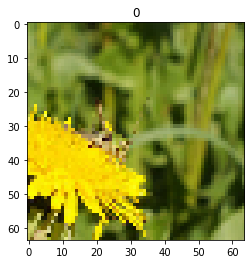

In [8]:
draw_flower(x[20]/255.0,y[20])

# Preprocessing

In [9]:
num_labels = len(np.unique(y))


In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [11]:
x_train.shape

(3242, 64, 64, 3)

In [12]:
x_test.shape

(1081, 64, 64, 3)

In [13]:
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1,image_size,image_size,3])
x_test = np.reshape(x_test,[-1,image_size,image_size,3])
x_train = x_train/255.0
x_test = x_test/255.0

In [14]:
y_train = to_categorical(y_train)


# **Building a Convolutional Neural Network to Classify flowers**

In [15]:
np.unique(y_test)

array([0, 1, 3, 4, 5])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       32896     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       131328

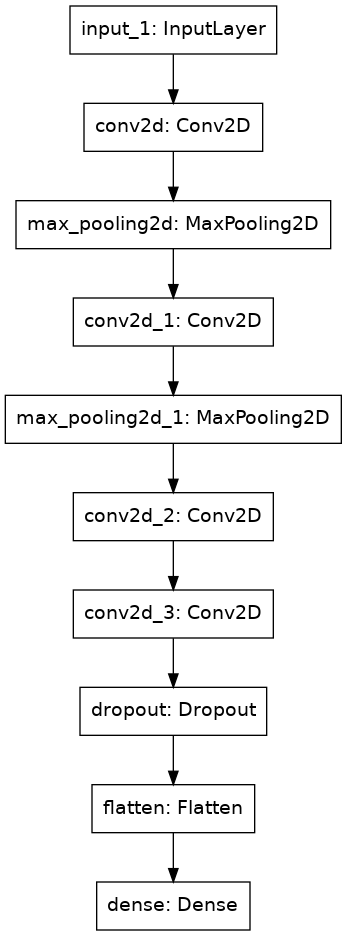

In [16]:
input_shape = (64,64,3)
inputs = Input(shape = input_shape)
x = inputs
x = Conv2D(32,kernel_size = 2,activation = 'relu',strides = 1,padding = 'same')(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Conv2D(64,kernel_size = 2,activation = 'relu',strides = 1,padding = 'same')(x)
x = MaxPooling2D(pool_size = (2,2))(x)


x = Conv2D(128,kernel_size = 2,activation = 'relu',strides = 1,padding = 'same')(x)
x = Conv2D(256,kernel_size = 2,activation = 'relu',strides = 1,padding = 'same')(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
outputs = Dense(6,activation = 'softmax')(x)
flower_classifier = Model(inputs,outputs)

flower_classifier.summary()
plot_model(flower_classifier)

In [17]:
flower_classifier.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [18]:
y_train.shape

(3242, 6)

In [19]:
flower_classifier.fit(x_train,y_train,batch_size = 128,epochs = 30)


Epoch 1/30
26/26 [==============================] - 4s 22ms/step - loss: 1.6088 - accuracy: 0.2876
Epoch 2/30
26/26 [==============================] - 0s 18ms/step - loss: 1.2010 - accuracy: 0.4920
Epoch 3/30
26/26 [==============================] - 0s 18ms/step - loss: 1.0708 - accuracy: 0.5811
Epoch 4/30
26/26 [==============================] - 0s 18ms/step - loss: 0.9727 - accuracy: 0.6142
Epoch 5/30
26/26 [==============================] - 0s 18ms/step - loss: 0.8932 - accuracy: 0.6421
Epoch 6/30
26/26 [==============================] - 0s 18ms/step - loss: 0.7983 - accuracy: 0.7048
Epoch 7/30
26/26 [==============================] - 0s 18ms/step - loss: 0.7579 - accuracy: 0.7115
Epoch 8/30
26/26 [==============================] - 0s 18ms/step - loss: 0.6922 - accuracy: 0.7498
Epoch 9/30
26/26 [==============================] - 0s 18ms/step - loss: 0.5880 - accuracy: 0.8040
Epoch 10/30
26/26 [==============================] - 0s 18ms/step - loss: 0.4946 - accuracy: 0.8337
Epoch 11/

In [20]:
test_case = flower_classifier.predict(x_test)
test_case

array([[9.9752480e-01, 2.0114494e-04, 3.9640487e-25, 1.7898614e-06,
        2.2722411e-03, 3.0776242e-08],
       [8.0476868e-01, 1.4875597e-01, 5.5850923e-23, 3.9871316e-05,
        1.5986367e-03, 4.4836711e-02],
       [1.1495132e-01, 7.3658228e-08, 9.4555205e-31, 8.8504398e-01,
        2.4748628e-08, 4.5864113e-06],
       ...,
       [3.5491074e-05, 2.3250030e-07, 4.2828846e-32, 9.9900848e-01,
        9.5580565e-04, 3.8951849e-11],
       [7.8108343e-03, 3.6896321e-07, 1.6953337e-30, 9.9082023e-01,
        1.3685396e-03, 3.8134793e-09],
       [9.9685174e-01, 9.9655484e-09, 7.5550621e-31, 2.3043195e-03,
        2.3796711e-05, 8.2013366e-04]], dtype=float32)

In [21]:
y_test_pred = np.argmax(test_case,axis = 1)

In [22]:
y_test_pred

array([0, 0, 3, ..., 3, 3, 0])

In [23]:
for i in range(50):
    print("actual",y_test[i],"predicted",y_test_pred[i])

actual 0 predicted 0
actual 0 predicted 0
actual 3 predicted 3
actual 0 predicted 1
actual 5 predicted 1
actual 4 predicted 5
actual 3 predicted 3
actual 4 predicted 1
actual 1 predicted 1
actual 4 predicted 4
actual 4 predicted 4
actual 5 predicted 5
actual 1 predicted 1
actual 0 predicted 1
actual 1 predicted 1
actual 0 predicted 0
actual 3 predicted 3
actual 4 predicted 5
actual 3 predicted 4
actual 3 predicted 3
actual 1 predicted 1
actual 0 predicted 0
actual 0 predicted 1
actual 4 predicted 4
actual 1 predicted 1
actual 1 predicted 0
actual 1 predicted 1
actual 1 predicted 0
actual 4 predicted 0
actual 1 predicted 1
actual 5 predicted 5
actual 4 predicted 4
actual 5 predicted 4
actual 3 predicted 3
actual 1 predicted 1
actual 0 predicted 4
actual 5 predicted 5
actual 4 predicted 4
actual 0 predicted 0
actual 1 predicted 0
actual 4 predicted 4
actual 5 predicted 0
actual 5 predicted 1
actual 5 predicted 0
actual 1 predicted 0
actual 1 predicted 4
actual 5 predicted 5
actual 5 pred